In [22]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [ ]:
load_dotenv()
model = ChatOpenAI()

In [24]:
class LLMState(TypedDict):
    question:str
    answer:str

In [25]:
def llm_qa(state:LLMState) -> LLMState:
    question = state['question']
    prompt = f'Answer the following questions {question}'
    answer = model.invoke(prompt).content
    state['answer'] = answer
    return state

In [26]:
graph = StateGraph(LLMState)
graph.add_node('llm_qa', llm_qa)
graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)
workflow = graph.compile()

In [ ]:
initial_state = {'question': 'How far is sun from the earth ?'}
final_state = workflow.invoke(initial_state)
print(final_state['answer'])


NameError: name 'model' is not defined

In [ ]:
model.invoke('How far is sun from the earth ?').content

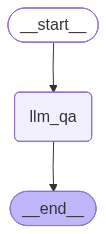

In [28]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())